#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm

#### Importing Data

In [2]:
df = pd.read_csv('day.csv')
df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


As we have yr, month and weekday in our dataset, I think all the features that can be extracted from date column are there. so will drop instant and dteday

In [3]:
df.drop(labels=['instant' ,'dteday'] ,axis = 1 ,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


All feature are numerical and their isn't any feature with missing values

In [5]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We need to appropriately label categorical columns

In [6]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [7]:
df['weekday'] = df['weekday'].replace(to_replace=[0,1,2,3,4,5,6] ,value=['Sun','Mon','Tues','Wed','Thrus','Fri','Sat'])

#### EDA

<AxesSubplot:xlabel='yr', ylabel='cnt'>

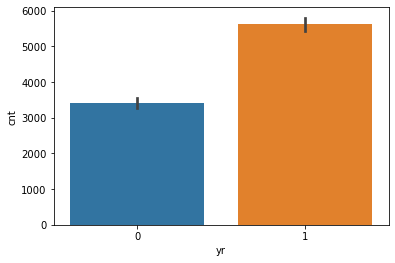

In [8]:
# cnt in different year
sns.barplot(x = 'yr' , y = 'cnt' , data = df)

There is increase in last two year.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

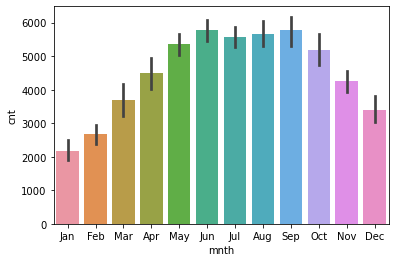

In [9]:
# cnt in different month
sns.barplot(x = 'mnth' , y = 'cnt' , data = df)

from may till oct we more number of bikes rented than other month, distribution is kind of normal.

<AxesSubplot:xlabel='casual', ylabel='Density'>

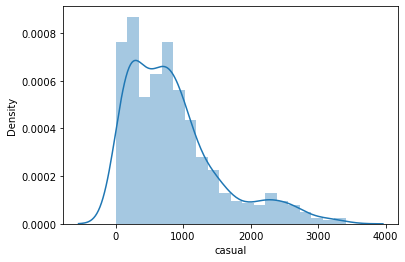

In [10]:
# Distribution of casual and registered
sns.distplot(df['casual'])

<AxesSubplot:xlabel='registered', ylabel='Density'>

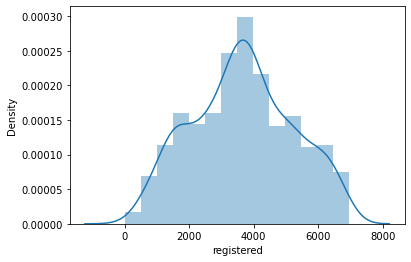

In [11]:
sns.distplot(df['registered'])

<AxesSubplot:xlabel='cnt', ylabel='Density'>

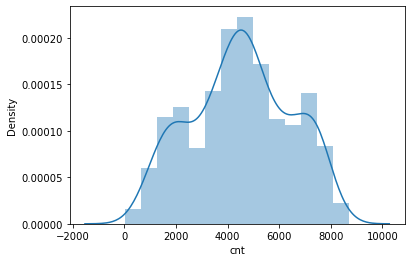

In [12]:
sns.distplot(df['cnt'])

Distribution of casual and registered is different as casual has shewed(on right side) while registered has normal distribution

<AxesSubplot:xlabel='season', ylabel='cnt'>

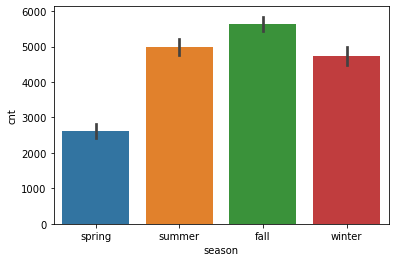

In [13]:
# Checking season wrt cnt
sns.barplot(x = 'season' , y = 'cnt' , data = df)

While spring has lowest and fall highest count. there isn't much difference between fall ,summer and winter

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

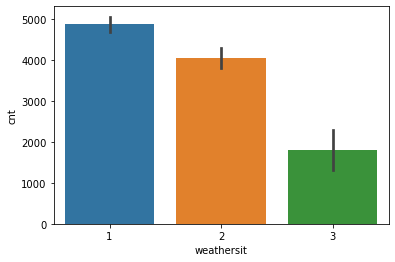

In [14]:
# Checking weathersit wrt cnt
sns.barplot(x = 'weathersit' , y = 'cnt' , data = df)

As we go towards higher weathr situation, count increases and 4th (Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) weathersit there isn't a single bike rent

now checking distribution of all weather related features

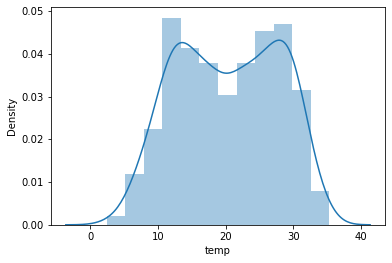

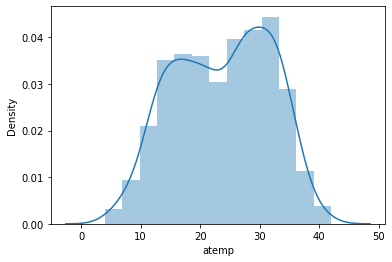

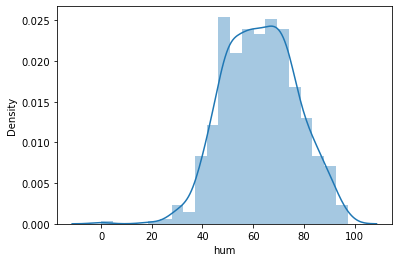

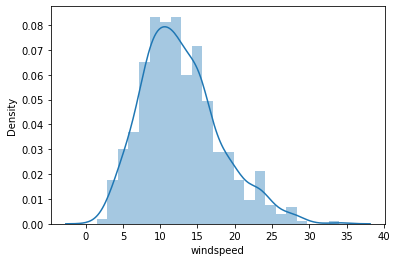

In [15]:
weath_feat = ['temp', 'atemp', 'hum', 'windspeed']
for i in weath_feat:
    sns.distplot(df[i])
    plt.show()

temp and atemp has similar distribution, while hum and windspeed has normal distribution

<AxesSubplot:xlabel='yr', ylabel='cnt'>

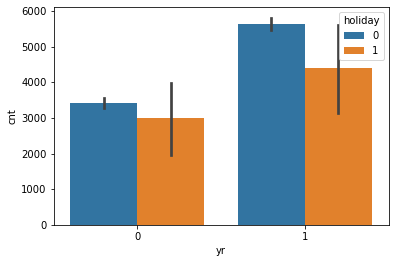

In [16]:
# cnt in different year taking holiday into account
sns.barplot(x = 'yr' , y = 'cnt' , hue = 'holiday' ,data = df)

Both category in workingday have same amount of rented bike, still there is slighter more number of bikes rented on non working day in 2019

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

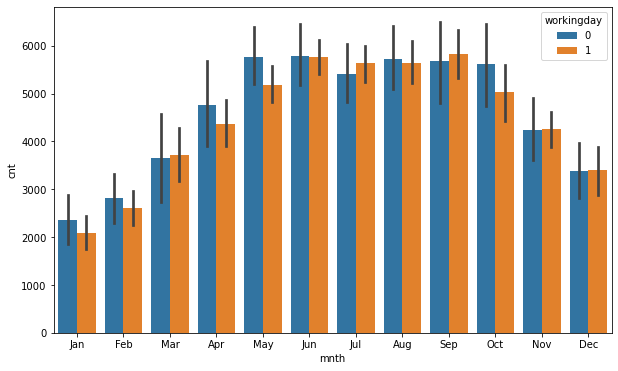

In [17]:
# cnt in different month taking working day into account
plt.figure(figsize=(10,6))
sns.barplot(x = 'mnth' , y = 'cnt' , hue = 'workingday' ,data = df)

for months also there isn't any significant difference

Checking relation between numerical columns and cnt variable

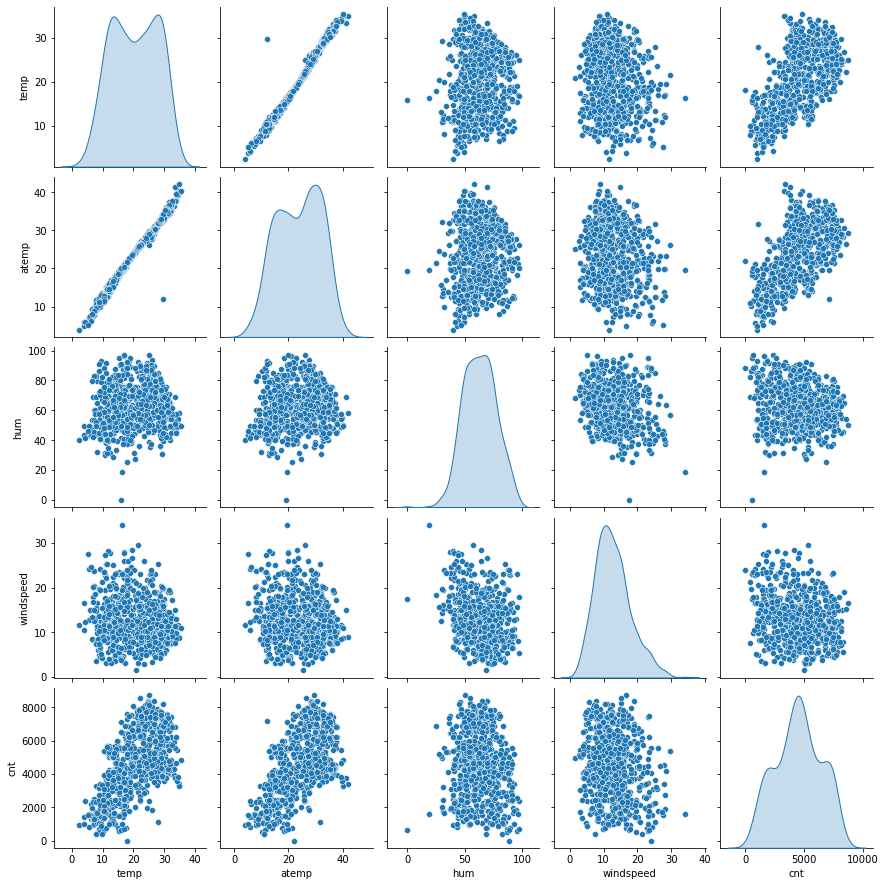

In [18]:
# first check weath_feat
chk = weath_feat + ['cnt']
sns.pairplot(df[chk] ,diag_kind='kde')

Three is a perfect correaltion between temp and atemp.
While cnt also seems to correlated with temp and atemp
windspeed and humidity seems to be randomly distributed

In [19]:
# Checking correation between (temp, atemp) and (casual, registered)
print(df[['temp','atemp']].corr())

           temp     atemp
temp   1.000000  0.991696
atemp  0.991696  1.000000


As both have almost perfect correlation we can remove one column, as temp can be easily attained than atemp. We will remove atemp

In [20]:
df.drop(labels=['atemp'] ,axis = 1 ,inplace = True)

In [21]:
df.corr()['cnt']

yr            0.569728
holiday      -0.068764
workingday   -0.027640
weathersit   -0.295929
temp          0.627044
hum          -0.098543
windspeed    -0.235132
casual        0.672123
registered    0.945411
cnt           1.000000
Name: cnt, dtype: float64

#### As we know that casual + registered = cnt.
In future we won't know casual and registered in advance more like they are also considered dependent variable.
so we will drop those.

In [22]:
df.drop(labels=[ 'casual','registered'] ,axis = 1 ,inplace = True)

#### Data quality check

In [23]:
# Checking missing values
df.isna().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

There isn't any missing value in the dataset

In [24]:
# imputing categorical columns
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thrus,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


As there aren't any object type of columns and all numerical columns seeme correctly imputed we can leave dataframe as it as.

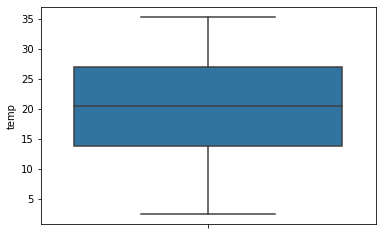

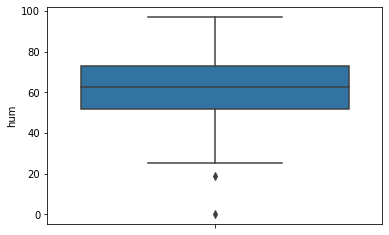

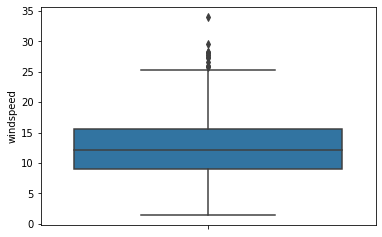

In [25]:
# Checking outliers
weath_feat =  ['temp', 'hum', 'windspeed']
for i in weath_feat:
    sns.boxplot(y = df[i])
    plt.show()

Other than in windspeed there isn't many outliers in the dataframe, so treating outliers step also can be skipped

In [26]:
# Capping of windspeed outliers
widspd_75 = df['windspeed'].describe()['75%']
widspd_25 = df['windspeed'].describe()['25%']
iqr = widspd_75 - widspd_25
uppr_lmt = widspd_75 + 1.5*iqr
df['windspeed'] = df['windspeed'].apply(lambda x : uppr_lmt if x>uppr_lmt else x )

<AxesSubplot:ylabel='windspeed'>

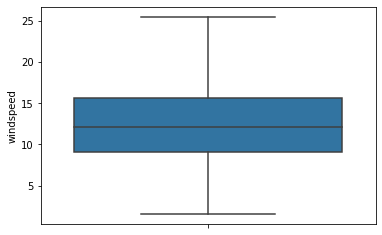

In [27]:
sns.boxplot(y = df['windspeed'])

#### Encoding categorical variable

In [28]:
df = pd.get_dummies(df, columns=['season','mnth','weekday','weathersit' ] ,drop_first=True)

In [29]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_spring  730 non-null    uint8  
 8   season_summer  730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Aug       730 non-null    uint8  
 11  mnth_Dec       730 non-null    uint8  
 12  mnth_Feb       730 non-null    uint8  
 13  mnth_Jan       730 non-null    uint8  
 14  mnth_Jul       730 non-null    uint8  
 15  mnth_Jun       730 non-null    uint8  
 16  mnth_Mar       730 non-null    uint8  
 17  mnth_May       730 non-null    uint8  
 18  mnth_Nov  

In [31]:
abs(df.corr()['cnt']).sort_values(ascending = False)

cnt              1.000000
temp             0.627044
yr               0.569728
season_spring    0.561702
mnth_Jan         0.367167
mnth_Feb         0.273848
weathersit_3     0.240602
windspeed        0.234234
mnth_Jun         0.195568
mnth_Sep         0.194664
mnth_Aug         0.182100
mnth_Dec         0.173878
weathersit_2     0.170686
mnth_Jul         0.166236
season_summer    0.145325
mnth_May         0.132553
mnth_Mar         0.128456
mnth_Oct         0.108846
hum              0.098543
holiday          0.068764
season_winter    0.064619
weekday_Mon      0.052581
weekday_Tues     0.049471
mnth_Nov         0.040344
weekday_Thrus    0.038672
weekday_Sun      0.033227
workingday       0.027640
weekday_Sat      0.025004
weekday_Wed      0.013282
Name: cnt, dtype: float64

#### Test Train split

In [32]:
# Creating dependent and independent features dataframe
y = df['cnt']
X = df.drop(labels='cnt',axis = 1)

In [33]:
# Doing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape ,X_test.shape)

(511, 28) (219, 28)


#### Scaling numerical columns as scale matters if we are trying to use modeling for interpretation, 

In [35]:
#we will scale only numerical column not categoricals
cols_to_scale = ['temp', 'hum', 'windspeed']
for i in cols_to_scale:
    mn = min(X_train[i])
    mx = max(X_train[i])
    X_train[i] = (X_train[i] - mn)/(mx-mn)
    X_test[i] = (X_test[i] - mn)/(mx-mn) 

In [36]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thrus,weekday_Tues,weekday_Wed,weathersit_2,weathersit_3
683,1,0,1,0.327133,0.639330,0.364559,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
645,1,1,0,0.403972,0.731215,0.466986,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
163,0,0,1,0.717562,0.509660,0.789884,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.785745,0.463555,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.123257,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


### Modeling 
#### cnt as y

Finding important features using recursive feature selection

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 11),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 9),
 ('weekday_Thrus', False, 14),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 4),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

I have also confirmed with creating model with all the columns and mnth and weekday has high p-value so we can remove these 

In [39]:
def bld_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [40]:
# Calculate the VIFs for the new model
def cal_VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif = pd.DataFrame()
    #X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [41]:
# taking only important feature to next step
col = X_train.columns[rfe.support_]
X_train_new = X_train[col]

#### Model 1

In [42]:
# as we would need to check significance of each features too we will use statmodels to for our model building
bld_model(col) 
cal_VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.44e-186
Time:                        13:09:10   Log-Likelihood:                -4122.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     495   BIC:                             8345.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3236.4985    301.469     10.736

,Features,VIF
3,hum,24.86
2,temp,16.97
4,windspeed,5.13
6,season_winter,2.91
5,season_spring,2.89
13,weathersit_2,2.24
0,yr,2.10
11,mnth_Nov,1.84
8,mnth_Jul,1.57
7,mnth_Dec,1.38


#### Model 2

In [43]:
# Removing hum
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring','season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar'
       , 'mnth_May','mnth_Nov', 'mnth_Sep', 'weathersit_2', 'weathersit_3']
bld_model(col) 
cal_VIF(X_train_new[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          6.71e-184
Time:                        13:09:10   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2430.4808    237.686     10.226

,Features,VIF
2,temp,5.89
3,windspeed,5.09
5,season_winter,2.47
0,yr,2.09
4,season_spring,1.86
10,mnth_Nov,1.79
12,weathersit_2,1.58
7,mnth_Jul,1.54
6,mnth_Dec,1.33
9,mnth_May,1.31


#### Model 3

In [44]:
# Removing mnth_May
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring','season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar'
       ,'mnth_Nov', 'mnth_Sep', 'weathersit_2', 'weathersit_3']
bld_model(col) 
cal_VIF(X_train_new[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.32e-184
Time:                        13:09:10   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8295.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2500.8632    234.923     10.645

,Features,VIF
2,temp,5.47
3,windspeed,5.08
5,season_winter,2.38
0,yr,2.09
4,season_spring,1.82
9,mnth_Nov,1.79
11,weathersit_2,1.57
7,mnth_Jul,1.44
6,mnth_Dec,1.33
10,mnth_Sep,1.24


At later point we can add temp again and check as their was quite a drop in r2_score

#### Model 4

In [45]:
# Removing temp
col = ['yr', 'holiday', 'windspeed', 'season_spring','season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar'
       ,'mnth_Nov', 'mnth_Sep', 'weathersit_2', 'weathersit_3']
bld_model(col) 
cal_VIF(X_train_new[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          6.10e-159
Time:                        13:09:10   Log-Likelihood:                -4196.6
No. Observations:                 511   AIC:                             8419.
Df Residuals:                     498   BIC:                             8474.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4930.8845    127.826     38.575

,Features,VIF
2,windspeed,2.78
4,season_winter,2.36
0,yr,1.92
8,mnth_Nov,1.77
3,season_spring,1.65
10,weathersit_2,1.53
5,mnth_Dec,1.32
7,mnth_Mar,1.17
6,mnth_Jul,1.15
9,mnth_Sep,1.14


#### Model 5

In [46]:
# Removing windspeed and add temp as it had highest correlation with target
col = ['yr', 'holiday', 'temp', 'season_spring','season_winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar'
       ,'mnth_Nov', 'mnth_Sep', 'weathersit_2', 'weathersit_3']
bld_model(col) 
cal_VIF(X_train_new[col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.97e-182
Time:                        13:09:11   Log-Likelihood:                -4141.3
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2047.2651    207.355      9.873

,Features,VIF
2,temp,2.98
4,season_winter,2.37
0,yr,2.07
8,mnth_Nov,1.75
10,weathersit_2,1.56
3,season_spring,1.40
6,mnth_Jul,1.40
5,mnth_Dec,1.33
9,mnth_Sep,1.23
7,mnth_Mar,1.17


Checking important features by dropping them and creating model and comparing r2 score. Lower the score higher the importance 

In [47]:
# Now to find top 3 important features
scr = []
for i in col:
    ck = X_train_new.drop(labels = [i] ,axis = 1)
    lr = LinearRegression()
    lr.fit(ck ,y_train)
    y_pred = lr.predict(ck)
 #   print(f'({i} : {r2_score(y_train,y_pred)}))
    print(f"{i}:{r2_score(y_train,y_pred)}")
    scr.append(r2_score(y_train,y_pred))

yr:0.5943391596699085
holiday:0.8384465782016859
temp:0.7900340526507088
season_spring:0.8170255113552786
season_winter:0.826607806868924
mnth_Dec:0.8375669724438501
mnth_Jul:0.8383274334952429
mnth_Mar:0.838232413535294
mnth_Nov:0.8353782383169881
mnth_Sep:0.8362359795605554
weathersit_2:0.8322074614306135
weathersit_3:0.8214241887615827


In [48]:
feat_com = pd.DataFrame()
feat_com['col'] = col
feat_com['scr'] = scr
feat_com.sort_values(by = 'scr')['col']

0                yr
2              temp
3     season_spring
11     weathersit_3
4     season_winter
10     weathersit_2
8          mnth_Nov
9          mnth_Sep
5          mnth_Dec
7          mnth_Mar
6          mnth_Jul
1           holiday
Name: col, dtype: object

#### Model 6

In [49]:
# Trying to create a simple model
X_train2 = X_train_new[['yr','season_spring','season_winter','weathersit_3','temp','windspeed']]
lr_final_cnt = LinearRegression()
lr_final_cnt.fit(X_train2 ,y_train)
cols = X_train.columns
y_pred = lr_final_cnt.predict(X_train2)
r2_score(y_train ,y_pred)

0.7852967014771158

From here we can see that with only 3 important columns, we still have 0.7804 of r2-score, which is still would be pretty good

#### Most Important Feature Order : yr ,season,temp 

#### Creating Final Model

In [50]:
# Using sklearn module
X_train1 = X_train[col]
lr = LinearRegression()
lr.fit(X_train1 ,y_train)

LinearRegression()

#### Residual Analysis 

In [51]:
# First we will check if error terms y_pred - y_true
y_pred = lr.predict(X_train1)

In [52]:
error_term = y_train - y_pred

Text(0.5, 0, 'Errors')

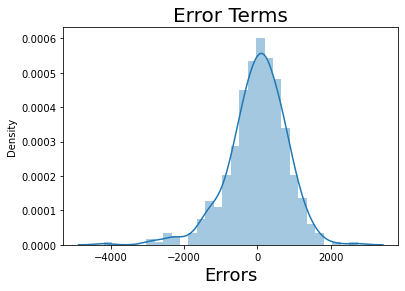

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error_term)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [54]:
# Using shapiro-wilk test to check normality of error terms
from scipy import stats
shapiro_test = stats.shapiro(error_term)
shapiro_test

ShapiroResult(statistic=0.9649291634559631, pvalue=1.0791973981127967e-09)

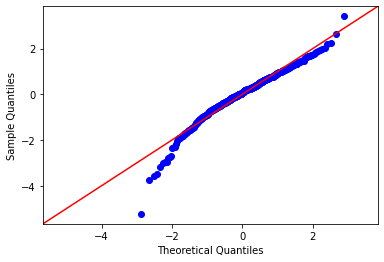

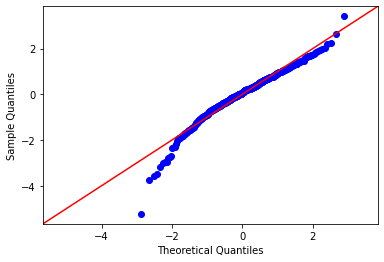

In [55]:
# Using q-q plot to check normality of error terms
sm.qqplot(error_term,line='45',fit=True,dist=stats.norm)

After seeing error term distribution , doing shapiro-wilk test and making q-q plot we can stat that our error term isn't seems like normal, we need to try some non linear algorithm models.

### Making prediction on test data and evaluating model performance

In [56]:
# Making pre4diction on test model
y_pred_tst = lr.predict(X_test[col])

In [57]:
lr.coef_

array([ 2002.06567555,  -586.58021788,  3571.7971897 , -1306.05520374,
         784.92075232,  -498.42698091,  -418.79847947,   473.79705835,
        -680.15861804,   431.11811476,  -703.34924661, -2376.3458512 ])

In [58]:
r2_score(y_test ,y_pred_tst)

0.8095145676149303

In [59]:
df_result = pd.DataFrame()
df_result['Actual'] = y_test
df_result['Predicted'] = y_pred_tst
df_result['error'] = df_result['Actual'] - df_result['Predicted']

### Checking Assumption

#### Checking Linearity Assumption

Text(-2.700000000000003, 0.5, 'Predicted')

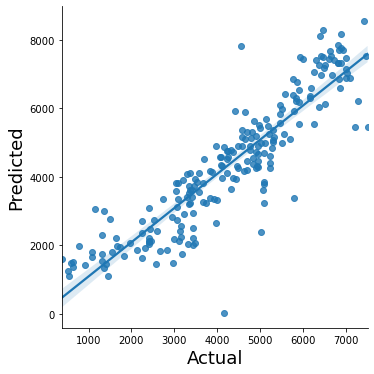

In [60]:
sns.lmplot(y = 'Actual' , x = 'Predicted' ,data = df_result)
plt.xlabel('Actual' ,fontsize = 18)
plt.ylabel('Predicted' ,fontsize = 18)

There does seem to have a linear relationship between actual and predicted but there are some outliers to consider

#### Normality of error term

In [61]:
from statsmodels.stats.diagnostic import normal_ad
p_value = normal_ad(df_result['error'])[1]
print('p-value from the test:', p_value)

p-value from the test: 6.313186269225681e-05


p-value below 0.05 generally means non-normal, so here error terms doesn't seems to be normal so we need to try some non linear models also.

#### No Multicollinearity among indenpendent features

In [62]:
cal_VIF(X_train[col])

,Features,VIF
2,temp,2.98
4,season_winter,2.37
0,yr,2.07
8,mnth_Nov,1.75
10,weathersit_2,1.56
3,season_spring,1.40
6,mnth_Jul,1.40
5,mnth_Dec,1.33
9,mnth_Sep,1.23
7,mnth_Mar,1.17


As all of the featurs have VIF less than 5, we can safely say they isn't any multicollinearity.  

#### No Autocorrelation of the Error Terms

In [63]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(df_result['error'])
durbinWatson

1.7966948336875848

As values betwen 1.5 to 2.5 show no autocorrelation, here we can say this assumption is satistfied

#### Homoscedasticity

Text(0, 0.5, 'error')

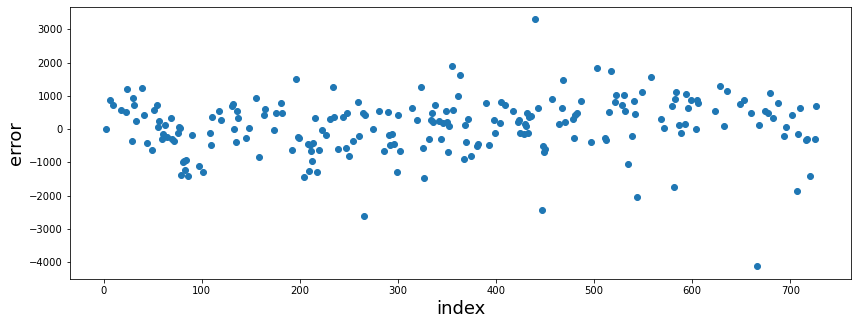

In [64]:
plt.figure(figsize=(14,5))
plt.scatter(x = df_result.index , y = df_result['error'])
plt.xlabel('index' ,fontsize = 18)
plt.ylabel('error' ,fontsize = 18)

As error terms are randomly distributed, we can say there is a constant variance among error trms

### Interpretating the result


We can see that the equation of our best fitted line is:
$ 2002.07 \times yr - 586.58 \times holiday + 3571.8 \times temp - 1306.06 \times season_spring + 784.92 \times season_winter - 498.43 \times mnth_Dec - 418.8 \times mnth_Jul + 473.8 \times mnth_Mar - 680.16 \times mnth_Nov + 431.12 \times mnth_Sep - 703.35 \times weathersit_2 - 2376.35 \times weathersit_3  $

#### Bussiness Interpretation

1. year is a good feature in predicting model, this can also kept in mind while making decision
2. Company should focus on expanding their business in month of Jul, Nov or in season of spring as they had negative effect
3. As days with holiday, weather with Mist + Cloudy or Light Snow, Light Rain has negative effect on cnt, so these days can be used to maintain the bikes

#### Importance Rank of Fetures in final model 

1.                yr 
2.              temp
3.     season_spring
4.    weathersit_3
5.     season_winter
6.     weathersit_2
7.          mnth_Nov
8.          mnth_Sep
9.          mnth_Dec
10.          mnth_Mar
11.          mnth_Jul
12.           holiday